<a href="https://colab.research.google.com/github/Aashi-sharma/Spotify_ETL_Data_Analysis/blob/main/Spotify_Data_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**


> https://www.kaggle.com/datasets/geomack/spotifyclassification



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
%matplotlib inline
!pip install plotly
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [2]:
sns.set_style("darkgrid")

**Load Dataset**

In [3]:
df = pd.read_csv("Spotify_song_attributes_dataset.csv")
df.drop("Unnamed: 0", axis =1, inplace= True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


**Data Cleaning**

In [4]:
#The count of missing values
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [6]:
df.shape

(2017, 16)

In [7]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [8]:
len(df.columns)

16

In [9]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


<Axes: >

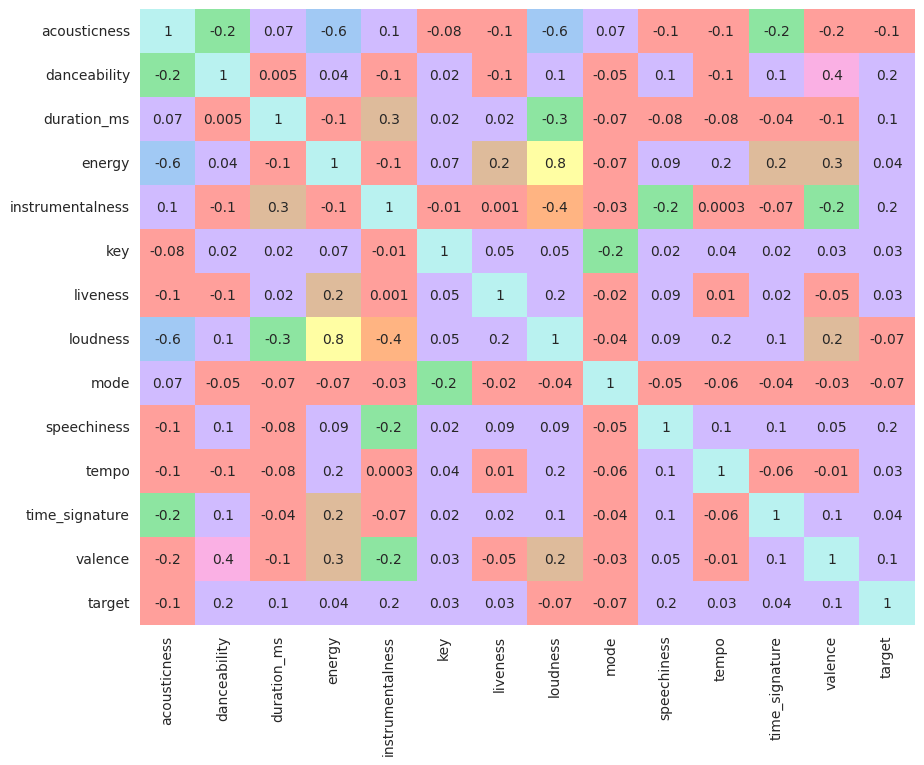

In [11]:
# Having a look at the correlation matrix

# Use a pastel color palette for the correlation matrix heatmap
pastel_colors = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap=pastel_colors, cbar=False)

**Data Analysis**



> **Liked Or Disliked Songs**



In [12]:
import plotly.express as px
import plotly.offline as pyo

labels = ["Liked Songs", "Not Liked Songs"]
values = df['target'].value_counts().tolist()

fig = px.pie(df, values=values, names=labels, title="Liked/Unliked Songs Distribution Pie Chart",
             color_discrete_sequence=["#9BABB8", "#D7C0AE"])
fig.show()
# Save the plot as an HTML file
pyo.plot(fig, filename='liked_unliked_pie_chart.html')

'liked_unliked_pie_chart.html'

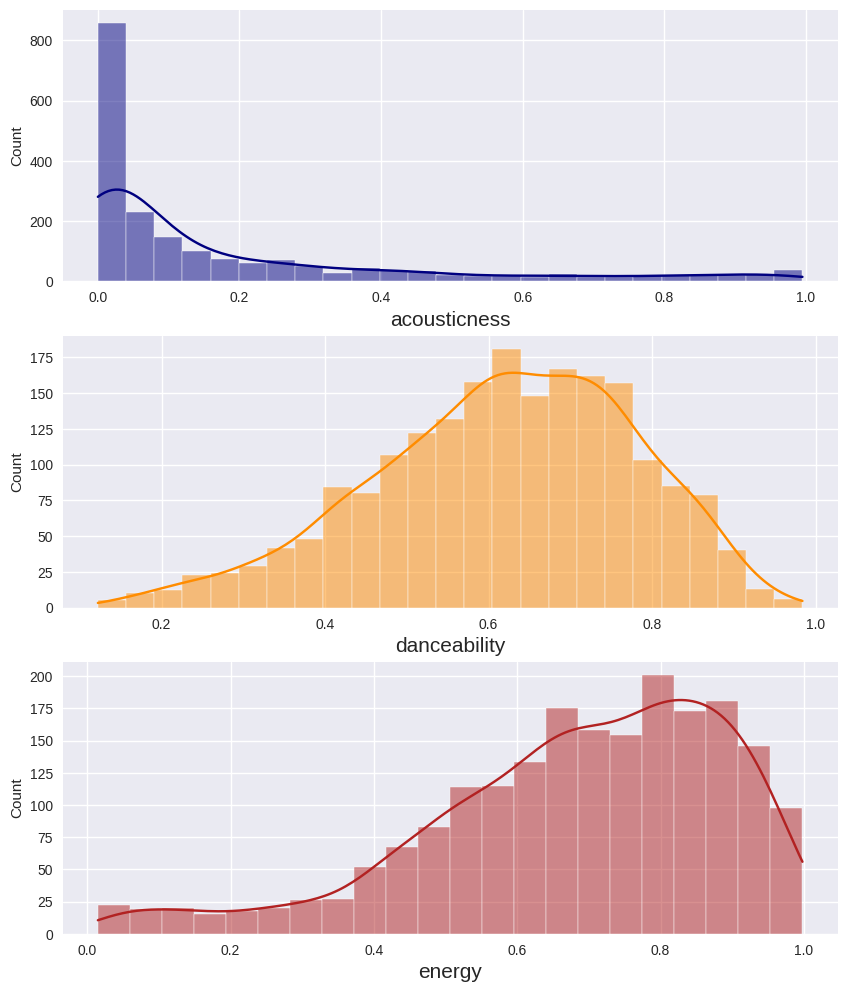

In [13]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(10,12))


sns.histplot(x = df["acousticness"], kde=True, ax=ax[0], color="navy");
ax[0].set_xlabel("acousticness",fontsize=15);

sns.histplot(x = df["danceability"], kde=True, ax=ax[1], color="darkorange");
ax[1].set_xlabel("danceability",fontsize=15);

sns.histplot(x = df["energy"], kde=True, ax=ax[2], color="firebrick");
ax[2].set_xlabel("energy",fontsize=15);

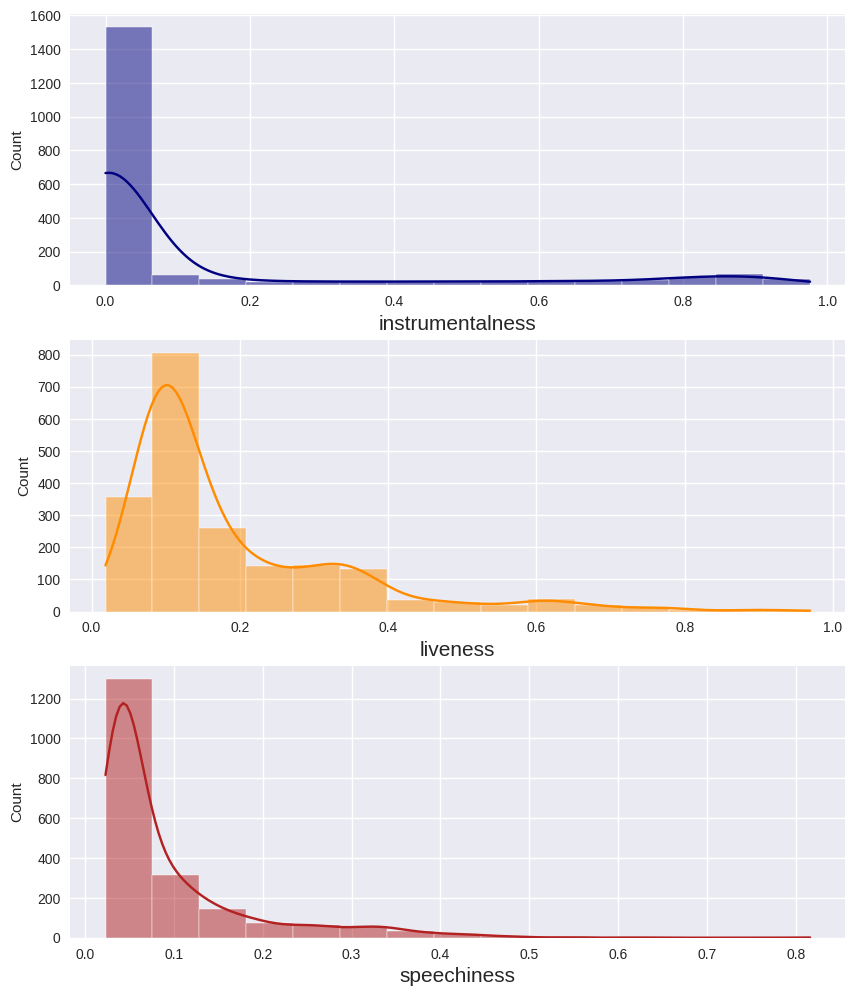

In [14]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(10,12))


sns.histplot(x = df["instrumentalness"], kde=True, ax=ax[0], color="navy", bins=15);
ax[0].set_xlabel("instrumentalness",fontsize=15);

sns.histplot(x = df["liveness"], kde=True, ax=ax[1], color="darkorange", bins=15);
ax[1].set_xlabel("liveness",fontsize=15);

sns.histplot(x = df["speechiness"], kde=True, ax=ax[2], color="firebrick", bins=15);
ax[2].set_xlabel("speechiness",fontsize=15);

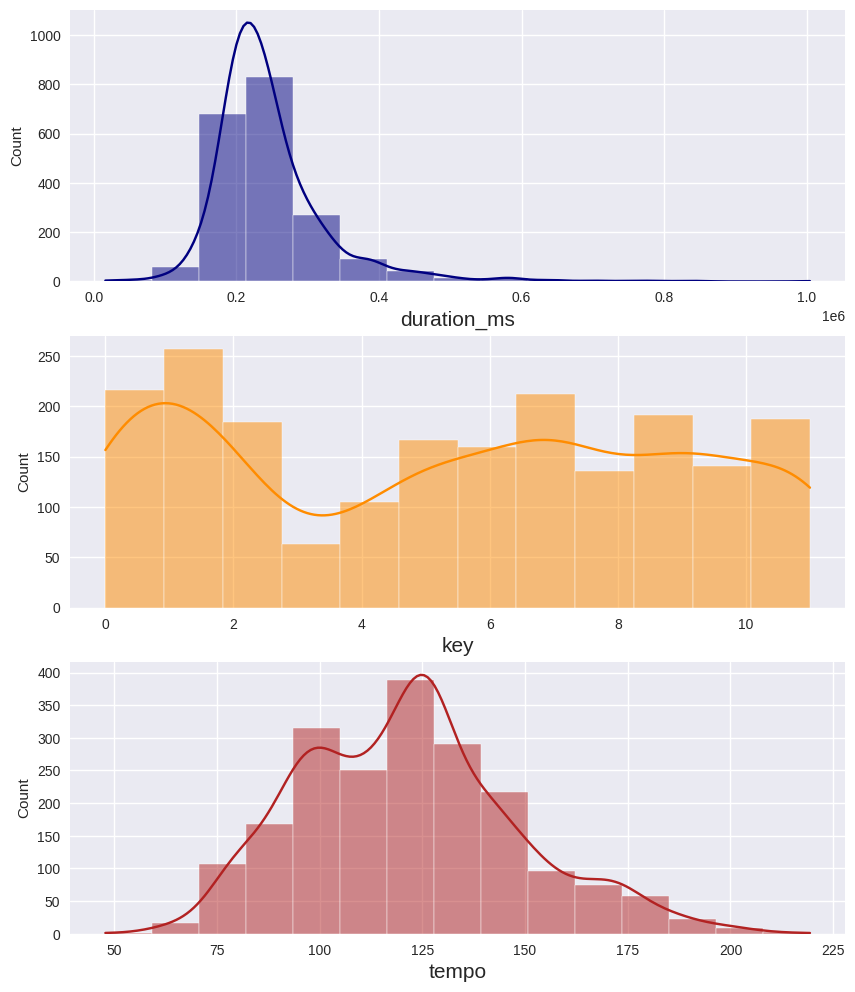

In [15]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(10,12))


sns.histplot(x = df["duration_ms"], kde=True, ax=ax[0], color="navy", bins=15);
ax[0].set_xlabel("duration_ms",fontsize=15);

sns.histplot(x = df["key"], kde=True, ax=ax[1], color="darkorange");
ax[1].set_xlabel("key",fontsize=15);

sns.histplot(x = df["tempo"], kde=True, ax=ax[2], color="firebrick", bins=15);
ax[2].set_xlabel("tempo",fontsize=15);

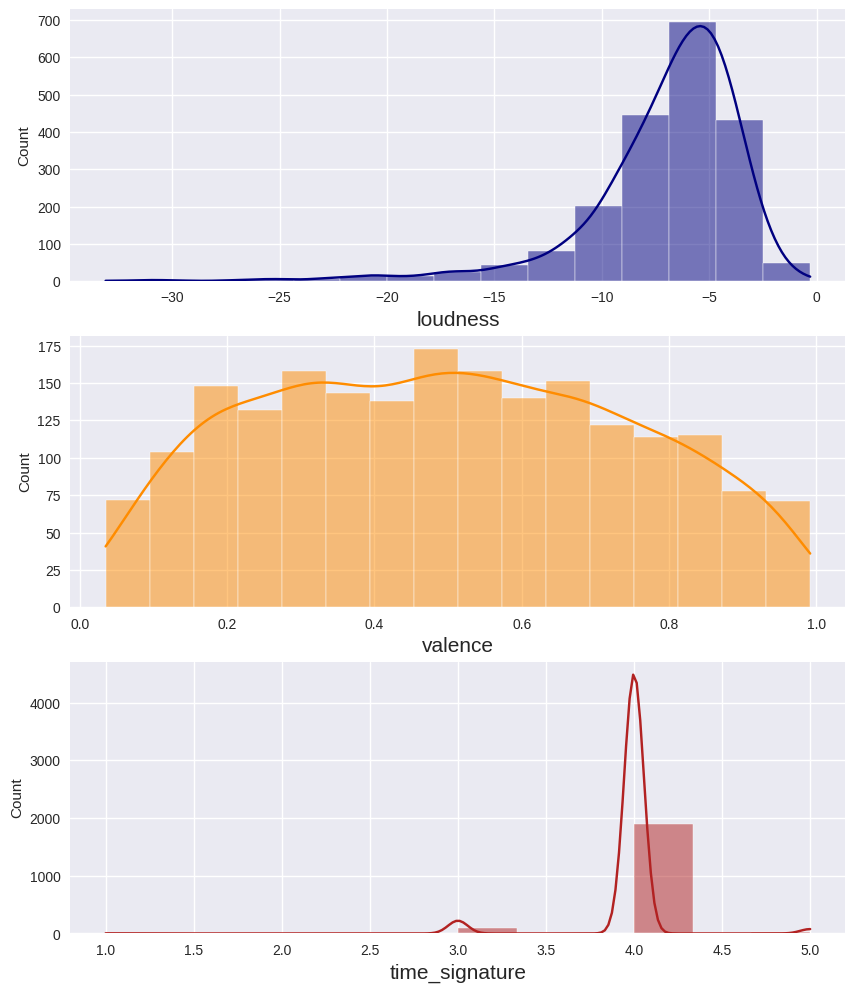

In [16]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(10,12))


sns.histplot(x = df["loudness"], kde=True, ax=ax[0], color="navy", bins=15);
ax[0].set_xlabel("loudness",fontsize=15);

sns.histplot(x = df["valence"], kde=True, ax=ax[1], color="darkorange");
ax[1].set_xlabel("valence",fontsize=15);

sns.histplot(x = df["time_signature"], kde=True, ax=ax[2], color="firebrick");
ax[2].set_xlabel("time_signature",fontsize=15);

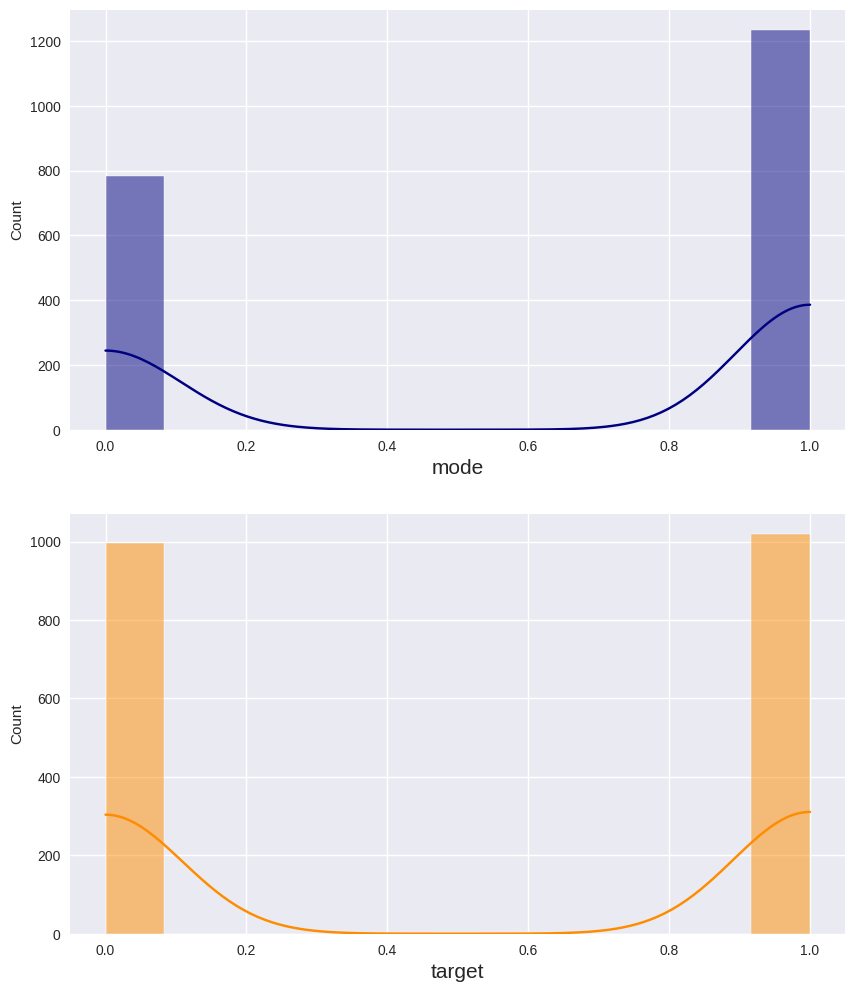

In [17]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(10,12))


sns.histplot(x = df["mode"], kde=True, ax=ax[0], color="navy");
ax[0].set_xlabel("mode",fontsize=15);

sns.histplot(x = df["target"], kde=True, ax=ax[1], color="darkorange");
ax[1].set_xlabel("target",fontsize=15);

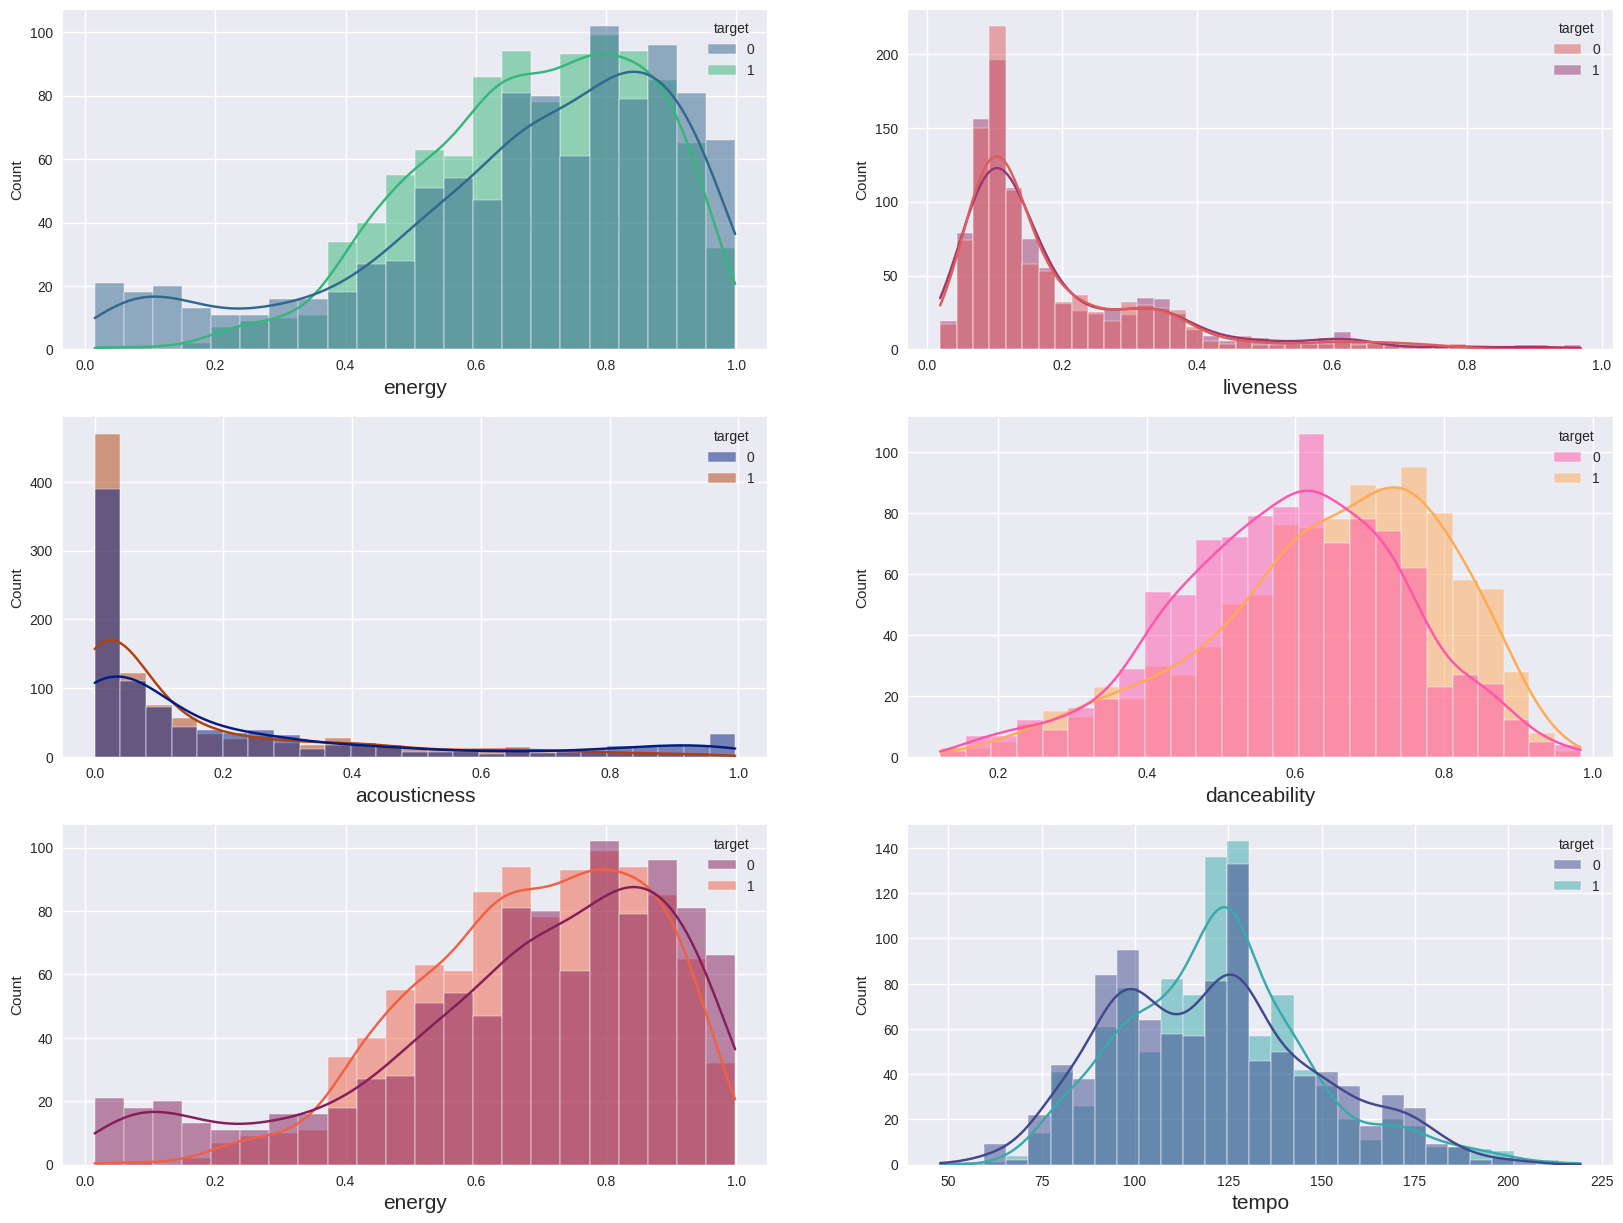

In [18]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,2, figsize=(20,15))

sns.histplot(x = df["energy"], hue = df["target"], kde=True, ax=ax[0,0], palette="viridis");
ax[0,0].set_xlabel("energy",fontsize=15);

sns.histplot(x = df["liveness"], hue = df["target"], kde=True, ax=ax[0,1], palette="flare");
ax[0,1].set_xlabel("liveness",fontsize=15);

sns.histplot(x = df["acousticness"], hue = df["target"], kde=True, ax=ax[1,0], palette="dark");
ax[1,0].set_xlabel("acousticness",fontsize=15);

sns.histplot(x = df["danceability"], hue = df["target"], kde=True, ax=ax[1,1], palette="spring");
ax[1,1].set_xlabel("danceability",fontsize=15);

sns.histplot(x = df["energy"], hue = df["target"], kde=True, ax=ax[2,0], palette="rocket");
ax[2,0].set_xlabel("energy",fontsize=15);

sns.histplot(x = df["tempo"], hue = df["target"], kde=True, ax=ax[2,1], palette="mako");
ax[2,1].set_xlabel("tempo",fontsize=15);


**Analytics based on question**



> **Top 5 most popular artists**



In [19]:
top_five_artists = df.groupby("artist").count().sort_values(by = "song_title", ascending = False)["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

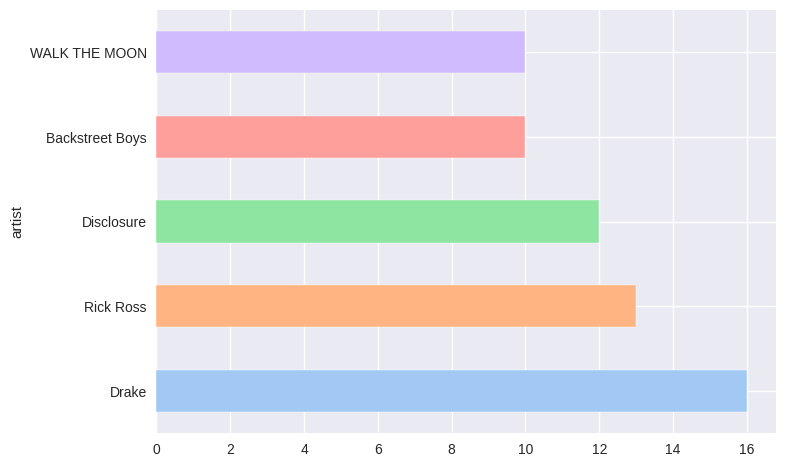

In [20]:
# Use a pastel color palette for the bar graph
pastel_colors = sns.color_palette("pastel")
top_five_artists.plot.barh(color=pastel_colors)
plt.show()



> **Top 5 loudest tracks**



In [21]:
top_five_loudest_tracks = df[["loudness", "song_title"]].sort_values(by = "loudness",ascending = True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


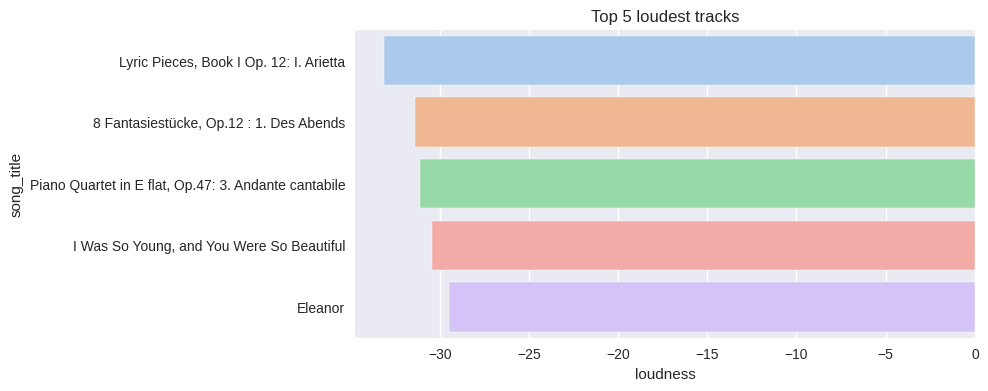

In [22]:
# Use a pastel color palette in the bar plot
pastel_colors = sns.color_palette("pastel")

plt.figure(figsize=(8,4))
sns.barplot(x = "loudness", y = "song_title", data = top_five_loudest_tracks, palette=pastel_colors)
plt.title("Top 5 loudest tracks")
plt.show()



> **Artist with the most dancebility song**



In [23]:
top_five_artists_danceable_song = df[["danceability", "song_title", "artist"]].sort_values(by = "danceability", ascending = False)[:5]
top_five_artists_danceable_song

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


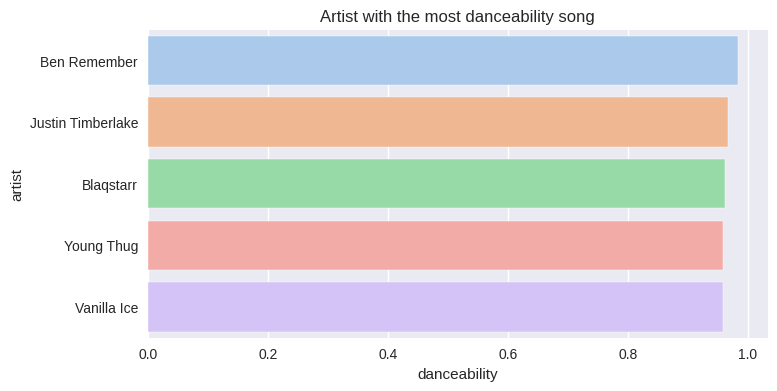

In [24]:
# Use a pastel color palette in the bar plot
pastel_colors = sns.color_palette("pastel")

# Your existing code
plt.figure(figsize=(8, 4))
sns.barplot(x="danceability", y="artist", data=top_five_artists_danceable_song, palette=pastel_colors)
plt.title("Artist with the most danceability song")
plt.show()



> **Top 5 instrumentalness tracks**



In [25]:
top_5_intrumental_tracks = df[["instrumentalness","song_title", "artist"]].sort_values(by = "instrumentalness",ascending = False)[:5]
top_5_intrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


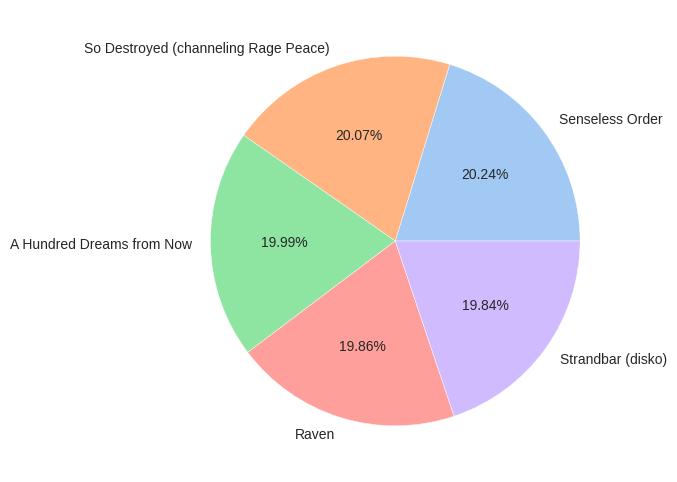

In [26]:
# Your existing code
plt.figure(figsize=(12, 6))

# Use a pastel color palette in the pie chart
pastel_colors = sns.color_palette("pastel")
plt.pie(x="instrumentalness", data=top_5_intrumental_tracks, autopct='%1.2f%%', labels=top_5_intrumental_tracks.song_title, colors=pastel_colors)

# Show the pie chart
plt.show()


**The Fun Begins** (How beautiful data can look like)

Let's explore! Next, we generate a list of "chosen" traits and use principal component analysis to reduce the dimensions of that list to 3, effectively creating a matrix suitable for generating the following 3-dimensional plot. The lesser the distance between any two songs, the larger the similarities in their traits.

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.graph_objs as go
import plotly.tools as tls

chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist"] + " - " + df["song_title"]
text2 = text1.values

X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

trace = go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y,
        colorscale="Viridis",
    )
)

layout = go.Layout(scene=dict(aspectmode="cube"))

fig = go.Figure(data=[trace], layout=layout)

# Save the plot as an HTML file
fig.write_html("3d_scatter_plot.html")

